In [43]:
import config
from pathlib import Path
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [4]:
list(map(lambda x: x.stem, Path(config.exp_root).glob('*')))

['finetune_resnet18_monument_train20p', 'finetune_resnet18_monument']

In [10]:
def read_exp(name):
    return pandas.concat([
        pandas.read_csv(p / 'log.csv')
        for p in ((config.exp_root / name).glob('trail_*'))
    ])

In [33]:
ft20 = read_exp('finetune_resnet18_monument_train20p')
ft = read_exp('finetune_resnet18_monument')

In [45]:
ft20std = ft20.groupby(ft20.epoch).std()[' val_Accuracy']
ft20mean = ft20.groupby(ft20.epoch).mean()[' val_Accuracy']
ftstd = ft.groupby(ft.epoch).std()[' val_Accuracy']
ftmean = ft.groupby(ft.epoch).mean()[' val_Accuracy']

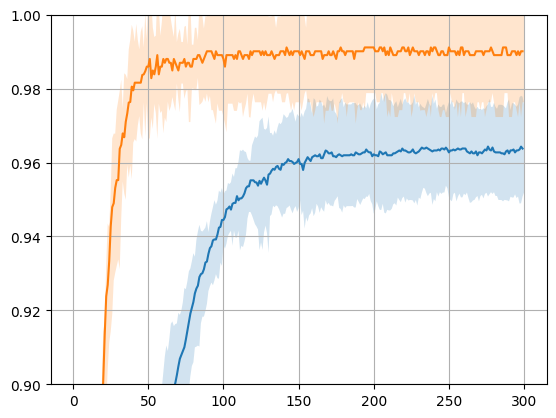

In [52]:
plt.plot(ft20mean, )
plt.fill_between(np.arange(300) + 1, ft20mean - 2*ft20std, ft20mean + 2*ft20std, alpha=0.2)

plt.plot(ftmean)
plt.fill_between(np.arange(300) + 1, ftmean - 2*ftstd, ftmean + 2*ftstd, alpha=0.2)
plt.ylim([0.9, 1.0])
plt.grid()